In [1]:
import pandas as pd
import requests
import json

In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
bitcoin_cash=("bitcoin_cash_price.csv")

bitcoin_cash_pd=pd.read_csv(bitcoin_cash)
bitcoin_cash_pd

#Date Range=Feb 20, 2018 - July 23, 2017 (year-month-day)

#volume, market cap, close, date 
#rename current price to close 
#rop ones that dont drive 

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Feb 20, 2018",1543.27,1569.03,1414.35,1418.73,"820,947,000","26,199,800,000"
1,"Feb 19, 2018",1483.34,1553.81,1483.34,1534.77,"578,906,000","25,179,700,000"
2,"Feb 18, 2018",1552.10,1641.40,1428.49,1487.46,"907,873,000","26,344,200,000"
3,"Feb 17, 2018",1548.48,1568.64,1517.14,1551.39,"641,719,000","26,280,100,000"
4,"Feb 16, 2018",1373.16,1558.66,1369.68,1552.20,"961,010,000","23,302,000,000"
...,...,...,...,...,...,...,...
208,"Jul 27, 2017",417.10,460.97,367.78,385.48,"533,207",-
209,"Jul 26, 2017",407.08,486.16,321.79,365.82,"1,784,640",-
210,"Jul 25, 2017",441.35,541.66,338.09,406.90,"524,908",-
211,"Jul 24, 2017",412.58,578.89,409.21,440.70,"190,952",-


In [4]:
bitcoin_cash_pd_col_clean=bitcoin_cash_pd.drop(['Open', 'High', 'Low'], axis=1)
bitcoin_cash_pd_col_clean

,Date,Close,Volume,Market Cap
0,"Feb 20, 2018",1418.73,"820,947,000","26,199,800,000"
1,"Feb 19, 2018",1534.77,"578,906,000","25,179,700,000"
2,"Feb 18, 2018",1487.46,"907,873,000","26,344,200,000"
3,"Feb 17, 2018",1551.39,"641,719,000","26,280,100,000"
4,"Feb 16, 2018",1552.20,"961,010,000","23,302,000,000"
...,...,...,...,...
208,"Jul 27, 2017",385.48,"533,207",-
209,"Jul 26, 2017",365.82,"1,784,640",-
210,"Jul 25, 2017",406.90,"524,908",-
211,"Jul 24, 2017",440.70,"190,952",-


In [5]:
## API/JSON from CoinGecko
dates = []
prices = []
market_caps = []
volumes = []
search_url = 'https://api.coingecko.com/api/v3/coins/bitcoin/history?date='

for year in range (2017,2019):
    for month in range (1,13):
        for day in range (1,32):
            dayf = "{:02d}".format(day)
            monthf = "{:02d}".format(month)
            datef = f"{dayf}-{monthf}-{year}"
            query = f"{search_url}{datef}"
            try:
                result = requests.get(query).json()
                Close = result['market_data']['current_price']['usd']
                Market_Cap = result['market_data']['market_cap']['usd']
                Volume = result['market_data']['total_volume']['usd']
                dates.append(datef)
                prices.append(Close)
                market_caps.append(Market_Cap)
                volumes.append(Volume)
            except:
                print(f"{query} : No Data Found")

btc_df = pd.DataFrame({
    "Date" : dates,
    "Market Cap" : market_caps,
    "Volume" : volumes,
    "Current Price" : prices
})

btc_df.head()

https://api.coingecko.com/api/v3/coins/bitcoin/history?date=29-02-2017 : No Data Found
https://api.coingecko.com/api/v3/coins/bitcoin/history?date=30-02-2017 : No Data Found
https://api.coingecko.com/api/v3/coins/bitcoin/history?date=31-02-2017 : No Data Found
https://api.coingecko.com/api/v3/coins/bitcoin/history?date=31-04-2017 : No Data Found
https://api.coingecko.com/api/v3/coins/bitcoin/history?date=24-06-2017 : No Data Found
https://api.coingecko.com/api/v3/coins/bitcoin/history?date=25-06-2017 : No Data Found
https://api.coingecko.com/api/v3/coins/bitcoin/history?date=26-06-2017 : No Data Found
https://api.coingecko.com/api/v3/coins/bitcoin/history?date=27-06-2017 : No Data Found
https://api.coingecko.com/api/v3/coins/bitcoin/history?date=28-06-2017 : No Data Found
https://api.coingecko.com/api/v3/coins/bitcoin/history?date=29-06-2017 : No Data Found
https://api.coingecko.com/api/v3/coins/bitcoin/history?date=30-06-2017 : No Data Found
https://api.coingecko.com/api/v3/coins/bitc

https://api.coingecko.com/api/v3/coins/bitcoin/history?date=02-04-2018 : No Data Found
https://api.coingecko.com/api/v3/coins/bitcoin/history?date=03-04-2018 : No Data Found
https://api.coingecko.com/api/v3/coins/bitcoin/history?date=04-04-2018 : No Data Found
https://api.coingecko.com/api/v3/coins/bitcoin/history?date=05-04-2018 : No Data Found
https://api.coingecko.com/api/v3/coins/bitcoin/history?date=06-04-2018 : No Data Found
https://api.coingecko.com/api/v3/coins/bitcoin/history?date=07-04-2018 : No Data Found
https://api.coingecko.com/api/v3/coins/bitcoin/history?date=08-04-2018 : No Data Found
https://api.coingecko.com/api/v3/coins/bitcoin/history?date=09-04-2018 : No Data Found
https://api.coingecko.com/api/v3/coins/bitcoin/history?date=10-04-2018 : No Data Found
https://api.coingecko.com/api/v3/coins/bitcoin/history?date=11-04-2018 : No Data Found
https://api.coingecko.com/api/v3/coins/bitcoin/history?date=12-04-2018 : No Data Found
https://api.coingecko.com/api/v3/coins/bitc

,Date,Market Cap,Volume,Current Price
0,01-01-2017,1.604599e+10,3.470830e+09,998.050000
1,02-01-2017,1.638793e+10,4.444828e+09,1019.198800
2,03-01-2017,1.665272e+10,4.399421e+09,1035.531300
3,04-01-2017,1.818766e+10,8.705359e+09,1130.849516
4,05-01-2017,1.593489e+10,1.210275e+10,990.667500


In [6]:
# Clean Data: Transform Date columns to date format then inner merge on date  

bitcoin_cash_pd_col_clean['Date'] = pd.to_datetime(bitcoin_cash_pd_col_clean['Date'])
btc_df['Date']= pd.to_datetime(btc_df['Date'])

# rename close to current price so that it is consistent terminology
bitcoin_cash_pd_col_clean = bitcoin_cash_pd_col_clean.rename(columns = {'Close': 'Current Price'})
bitcoin_cash_pd_col_clean = bitcoin_cash_pd_col_clean[['Date', 'Market Cap', 'Volume', 'Current Price']]


In [7]:
# Insert Identifiers for each cryptocurrency
bitcoin_cash_pd_col_clean ['ID'] = 1
btc_df['ID']= 0



In [8]:
cash_df = bitcoin_cash_pd_col_clean
cash_df.head()

,Date,Market Cap,Volume,Current Price,ID
0,2018-02-20,"26,199,800,000","820,947,000",1418.73,1
1,2018-02-19,"25,179,700,000","578,906,000",1534.77,1
2,2018-02-18,"26,344,200,000","907,873,000",1487.46,1
3,2018-02-17,"26,280,100,000","641,719,000",1551.39,1
4,2018-02-16,"23,302,000,000","961,010,000",1552.20,1


In [9]:
btc_df.head()

,Date,Market Cap,Volume,Current Price,ID
0,2017-01-01,1.604599e+10,3.470830e+09,998.050000,0
1,2017-02-01,1.638793e+10,4.444828e+09,1019.198800,0
2,2017-03-01,1.665272e+10,4.399421e+09,1035.531300,0
3,2017-04-01,1.818766e+10,8.705359e+09,1130.849516,0
4,2017-05-01,1.593489e+10,1.210275e+10,990.667500,0


In [10]:
primary_df = pd.DataFrame({'id':[0,1],
 'currency': ['bitcoin', 'bitcoin_cash'],
 })
primary_df.set_index('id')
primary_df.to_csv('primary.csv')

In [11]:
Combined_df = pd.concat([btc_df, cash_df])


In [12]:
Combined_df ['Market Cap'] = Combined_df ['Market Cap'].apply(pd.to_numeric, errors = 'coerce')
Combined_df ['Volume'] = Combined_df ['Volume'].apply(pd.to_numeric, errors = 'coerce')
Combined_df ['Current Price'] = Combined_df ['Current Price'].apply(pd.to_numeric, errors = 'coerce')

Combined_df

,Date,Market Cap,Volume,Current Price,ID
0,2017-01-01,1.604599e+10,3.470830e+09,998.050000,0
1,2017-02-01,1.638793e+10,4.444828e+09,1019.198800,0
2,2017-03-01,1.665272e+10,4.399421e+09,1035.531300,0
3,2017-04-01,1.818766e+10,8.705359e+09,1130.849516,0
4,2017-05-01,1.593489e+10,1.210275e+10,990.667500,0
...,...,...,...,...,...
208,2017-07-27,NaN,NaN,385.480000,1
209,2017-07-26,NaN,NaN,365.820000,1
210,2017-07-25,NaN,NaN,406.900000,1
211,2017-07-24,NaN,NaN,440.700000,1


In [13]:
Combined_df.dropna()
Combined_df

,Date,Market Cap,Volume,Current Price,ID
0,2017-01-01,1.604599e+10,3.470830e+09,998.050000,0
1,2017-02-01,1.638793e+10,4.444828e+09,1019.198800,0
2,2017-03-01,1.665272e+10,4.399421e+09,1035.531300,0
3,2017-04-01,1.818766e+10,8.705359e+09,1130.849516,0
4,2017-05-01,1.593489e+10,1.210275e+10,990.667500,0
...,...,...,...,...,...
208,2017-07-27,NaN,NaN,385.480000,1
209,2017-07-26,NaN,NaN,365.820000,1
210,2017-07-25,NaN,NaN,406.900000,1
211,2017-07-24,NaN,NaN,440.700000,1


In [14]:
Combined_df.to_csv('combined_data.csv')

In [15]:
Merged_data= pd.merge(bitcoin_cash_pd_col_clean,btc_df, on = 'Date', how= 'inner', suffixes=('_bcc', '_btc') )
Merged_data.head()

,Date,Market Cap_bcc,Volume_bcc,Current Price_bcc,ID_bcc,Market Cap_btc,Volume_btc,Current Price_btc,ID_btc
0,2018-02-20,"26,199,800,000","820,947,000",1418.73,1,1.873642e+11,3.486172e+09,11103.090036,0
1,2018-02-19,"25,179,700,000","578,906,000",1534.77,1,1.775613e+11,4.740379e+09,10523.429306,0
2,2018-02-18,"26,344,200,000","907,873,000",1487.46,1,1.856923e+11,3.699819e+09,11006.647686,0
3,2018-02-17,"26,280,100,000","641,719,000",1551.39,1,1.713092e+11,3.141039e+09,10155.277056,0
4,2018-02-16,"23,302,000,000","961,010,000",1552.20,1,1.705698e+11,4.332357e+09,10112.580143,0


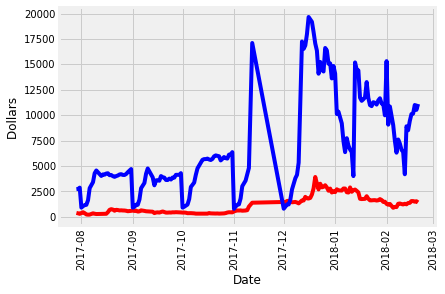

In [36]:
plt.plot(Merged_data['Date'], Merged_data['Current Price_bcc'],'r')
plt.plot(Merged_data['Date'], Merged_data['Current Price_btc'],'b')
plt.xlabel('Date')
plt.ylabel('Dollars ')
plt.xticks(rotation=90)

plt.savefig('./chart.png')
plt.show()

